In [111]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

In [218]:
m = 1
u = 0.012151
L1 = 0.836915
L2 = 1.15568
L3 = -1.00506


C1 = 3.18950841737352
C2 = 3.17315916582532
C3 = 3.01227396009323
C4 = 2.98887326529416
C5 = C4

def Fx(x,vx,y,vy,t):
    p1 = ((x+u)**2 + y**2)**0.5
    p2 = ((x-1+u)**2 + y**2)**0.5
    return 2*vy+x-(1-u)*(x+u)/p1**3-u*(x-1+u)/p2**3
def Fy(x,vx,y,vy,t):
    p1 = ((x+u)**2 + y**2)**0.5
    p2 = ((x-1+u)**2 + y**2)**0.5
    return -2*vx+y-(1-u)*y/p1**3-u*y/p2**3
def EulerRichardson(x0,vx0,y0,vy0,start,end,steps):
    vx_out = []
    x_out = []
    vy_out = []
    y_out = []
    t = np.linspace(start,end,steps)
    h = t[1]-t[0]
    x_n = x0
    vx_n = vx0
    y_n = y0
    vy_n = vy0
    x_out.append(x0)
    vx_out.append(vx0)
    y_out.append(y0)
    vy_out.append(vy0)
    for i in range(1,len(t)):
        ax_n = Fx(x_n,vx_n,y_n,vy_n,t[i])/m
        ay_n = Fy(x_n,vx_n,y_n,vy_n,t[i])/m
        vx_mid = vx_n + 0.5*ax_n*h
        x_mid = x_n + 0.5*vx_n*h
        vy_mid = vy_n + 0.5*ay_n*h
        y_mid = y_n + 0.5*vy_n*h
        ax_mid = Fx(x_mid,vx_mid,y_mid,vy_mid,t[i]+0.5*h)/m
        ay_mid = Fy(x_mid,vx_mid,y_mid,vy_mid,t[i]+0.5*h)/m
        vx_n_plus_1 = vx_n + ax_mid*h
        x_n_plus_1 = x_n + vx_mid*h
        vy_n_plus_1 = vy_n + ay_mid*h
        y_n_plus_1 = y_n + vy_mid*h
        vx_out.append(vx_n_plus_1)
        x_out.append(x_n_plus_1)
        vy_out.append(vy_n_plus_1)
        y_out.append(y_n_plus_1)
        x_n = x_n_plus_1
        vx_n = vx_n_plus_1
        y_n = y_n_plus_1
        vy_n = vy_n_plus_1
    return x_out,vx_out,y_out,vy_out,t

In [4]:
x_out,vx_out,y_out,vy_out,t = EulerRichardson(0.5,0,0.87,0,0,1000,100000)

4.616167758124379e-07


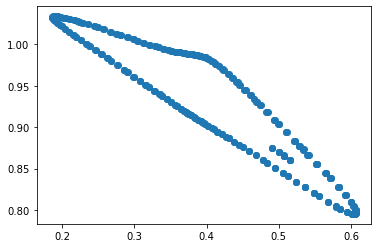

In [5]:
x_out_poincare_sec = []
y_out_poincare_sec = []
j = 0
vy_min = 10
for i in range(len(x_out)):
    if(vy_out[i] < vy_min and vy_out[i]>-0):
        vy_min = vy_out[i]
    if(vx_out[i] > 0 and vy_out[i]<1e-3 and vy_out[i]>0.0):
        x_out_poincare_sec.append(x_out[i])
        y_out_poincare_sec.append(y_out[i])
print(vy_min)
plt.plot(x_out_poincare_sec,y_out_poincare_sec,'o')

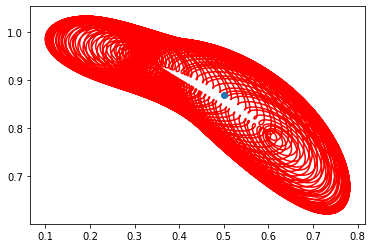

100000


In [6]:
# plt.plot(t,x_out,'b')
# plt.plot(t,y_out,'g')
plt.plot(x_out,y_out,'r')
plt.plot(0.5,0.87,'o')
plt.show()
print(len(x_out))

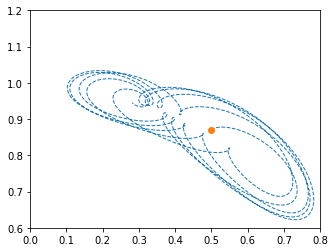

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
# %matplotlib notebook


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(0, 0.8), ylim=(0.6, 1.2))
line, = ax.plot([], [],'--',lw=1)
line2, = ax.plot([],[],'o-',lw=1)
j = 0
x_out_plot = []
y_out_plot = []
h = t[1]-t[0]
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data(0.5,0.87)
    x_out_plot.clear()
    y_out_plot.clear()
    j = 0
    return line,line2

# animation function.  This is called sequentially
def animate(i):
    global j
    x_out_plot.append(x_out[j])
    y_out_plot.append(y_out[j])
    line.set_data(x_out_plot,y_out_plot)
    j+=1
    return line,

from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * h - (t1 - t0)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=9999, interval=interval, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=100, extra_args=['-vcodec', 'libx264'])

# plt.show()

<Figure size 432x288 with 0 Axes>

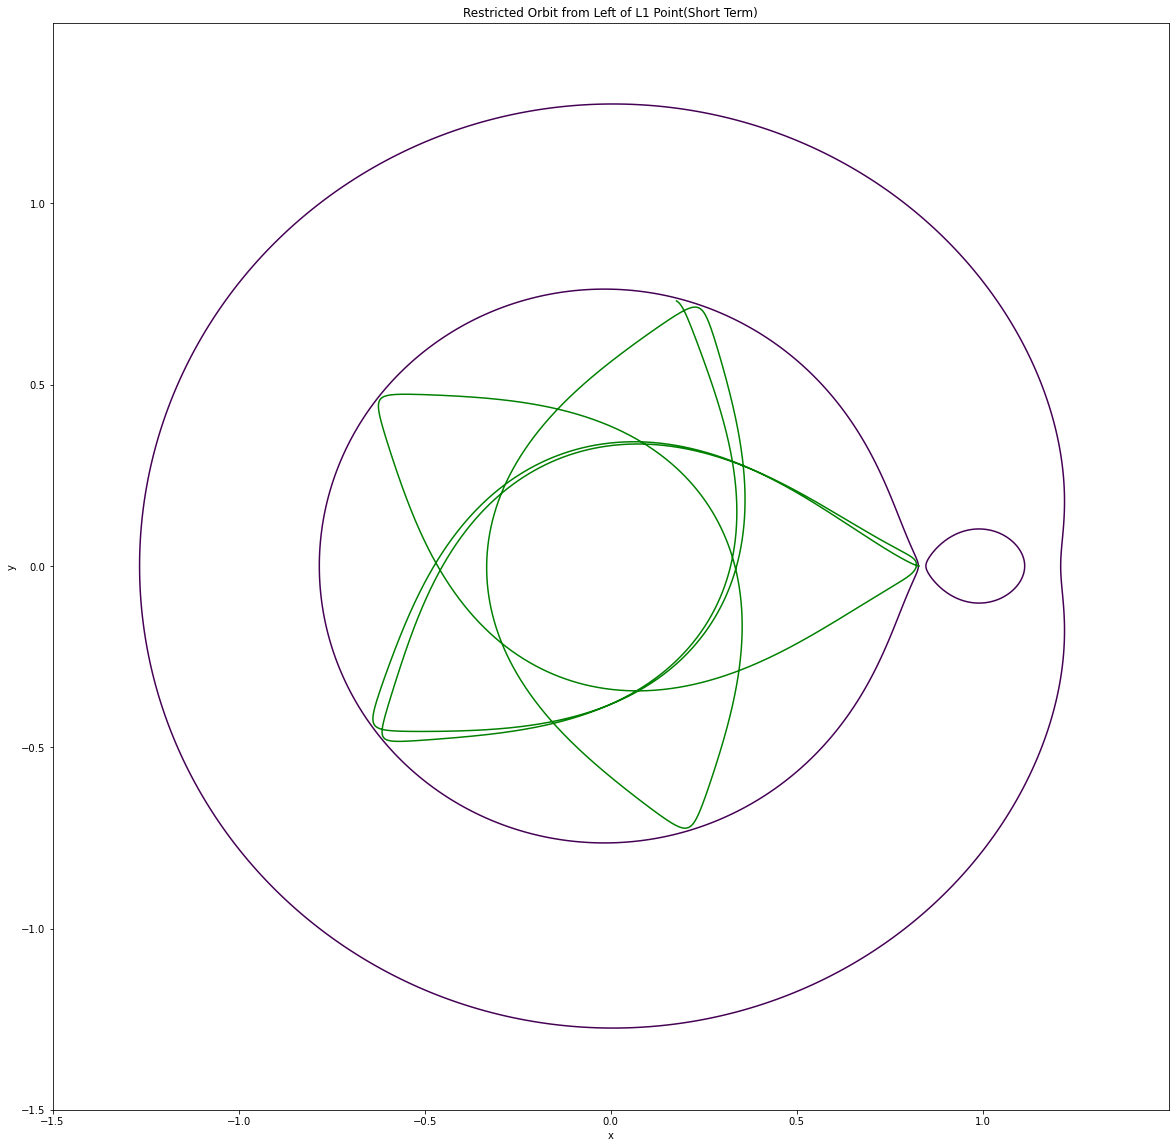

In [110]:
feature_x = np.arange(-1.5, 1.5, 0.001)
feature_y = np.arange(-1.5, 1.5, 0.001)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
# print(type(X))
# print(len(X))
  
f = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(20)
Z = X**2 + Y**2 + 2*(1-u)/np.sqrt((X+u)**2+Y**2) + 2*u/np.sqrt((X-1+u)**2+Y**2)
  
# plots contour lines
ax.contour(X, Y, Z, [3.18950841737352])
  
ax.set_title('Restricted Orbit from Left of L1 Point(Short Term)')
ax.set_xlabel('x')
ax.set_ylabel('y')

# 

x_out,vx_out,y_out,vy_out,t = EulerRichardson(L1-0.01*L1,0,0,0,0,20,10000)
plt.plot(x_out,y_out,'g')


plt.show()

<Figure size 432x288 with 0 Axes>

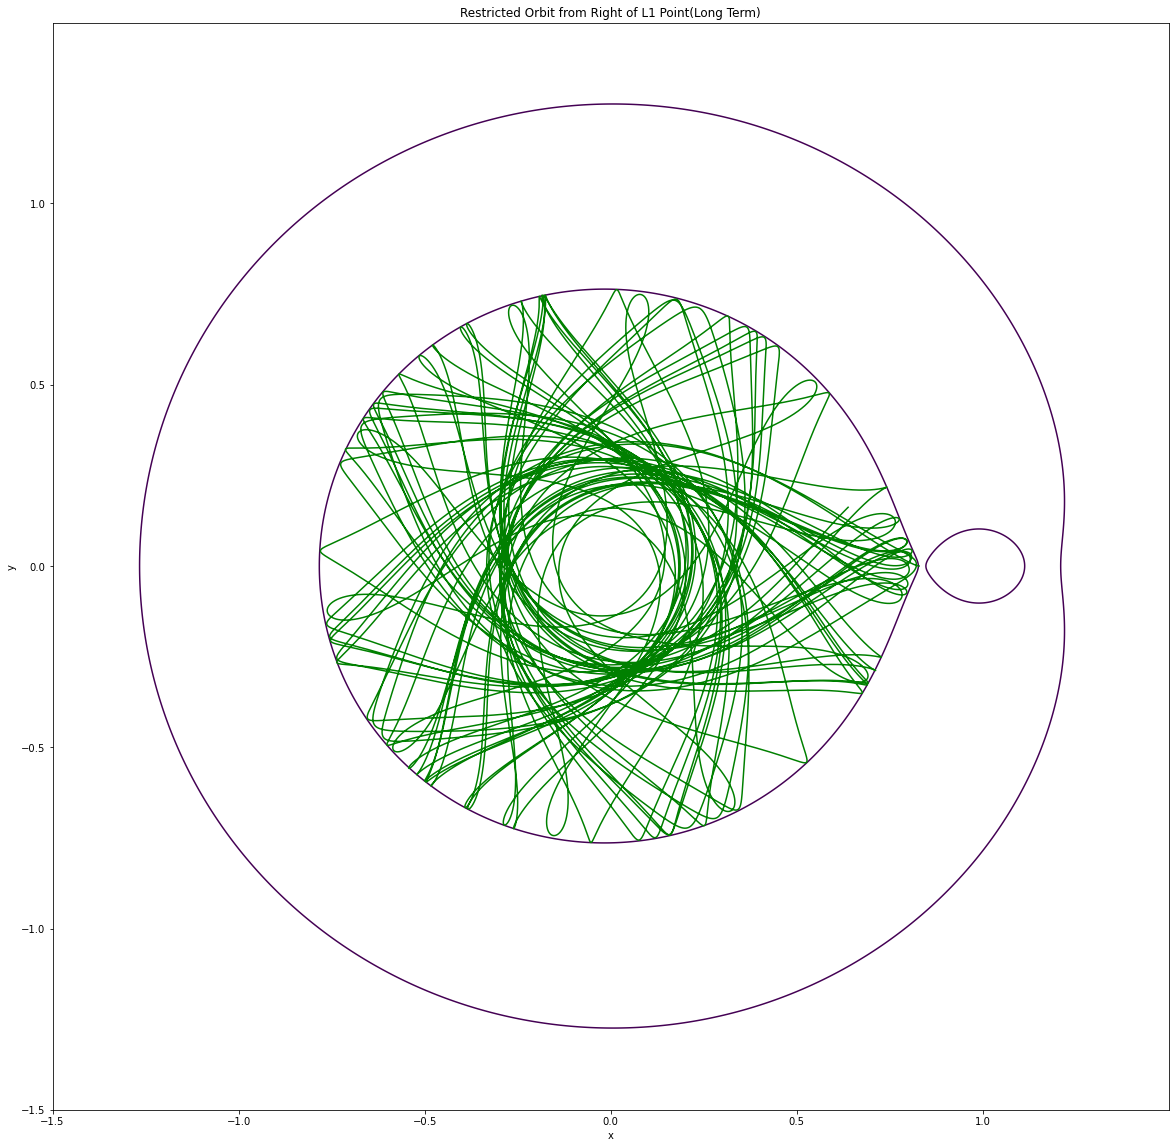

In [122]:
feature_x = np.arange(-1.5, 1.5, 0.001)
feature_y = np.arange(-1.5, 1.5, 0.001)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
# print(type(X))
# print(len(X))
  
f = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(20)
Z = X**2 + Y**2 + 2*(1-u)/np.sqrt((X+u)**2+Y**2) + 2*u/np.sqrt((X-1+u)**2+Y**2)
  
# plots contour lines
ax.contour(X, Y, Z, [3.18950841737352])
  
ax.set_title('Restricted Orbit from Left of L1 Point(Long Term)')
ax.set_xlabel('x')
ax.set_ylabel('y') 

x_out,vx_out,y_out,vy_out,t = EulerRichardson(L1-0.01*L1,0,0,0,0,200,100000)
plt.plot(x_out,y_out,'g')


plt.show()

<Figure size 432x288 with 0 Axes>

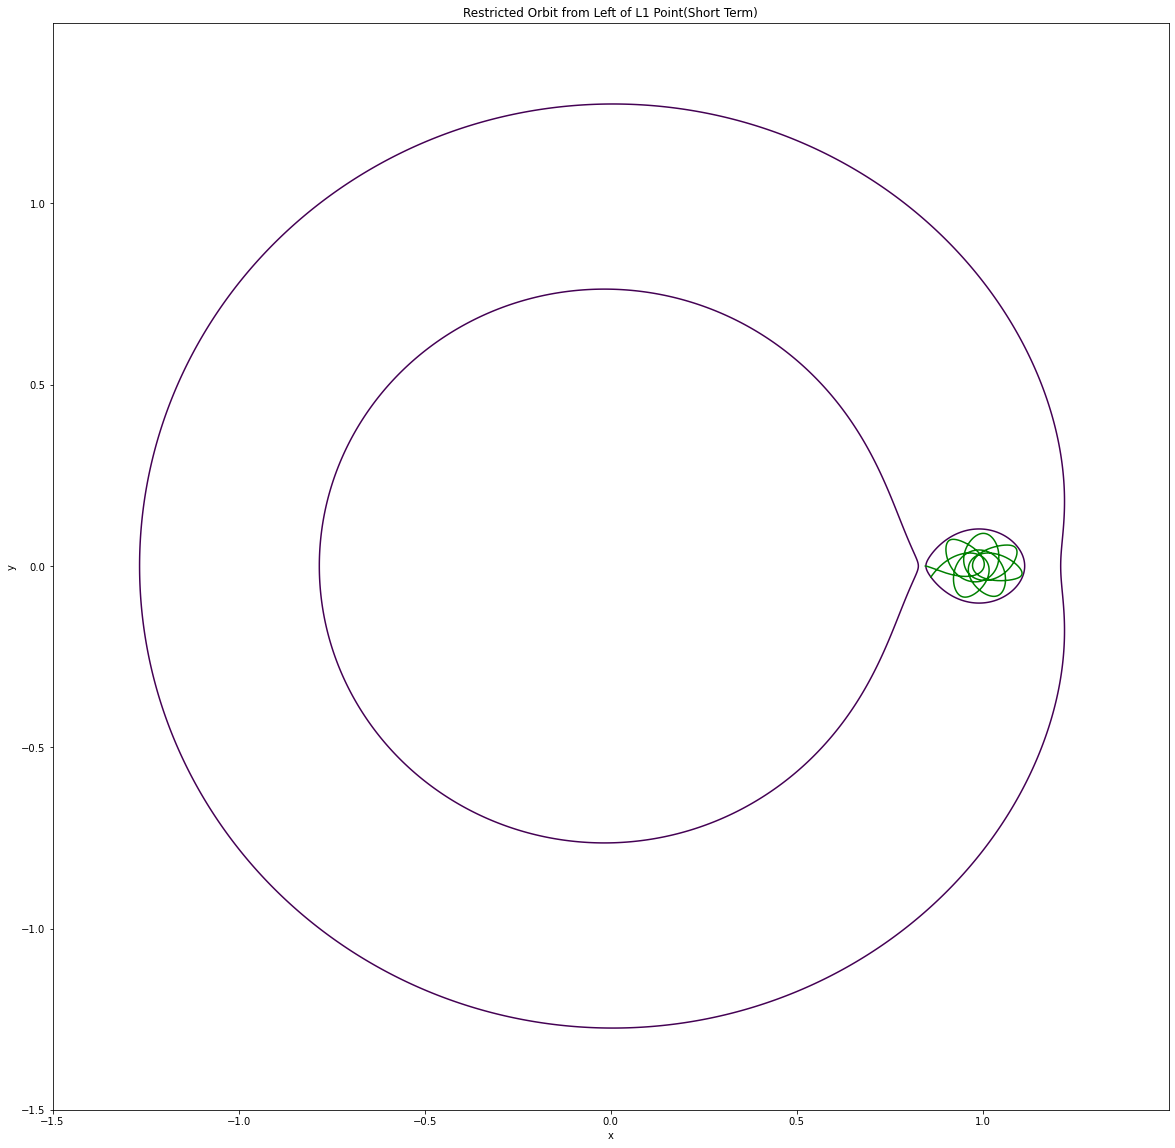

In [116]:
feature_x = np.arange(-1.5, 1.5, 0.001)
feature_y = np.arange(-1.5, 1.5, 0.001)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
# print(type(X))
# print(len(X))
  
f = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(20)
Z = X**2 + Y**2 + 2*(1-u)/np.sqrt((X+u)**2+Y**2) + 2*u/np.sqrt((X-1+u)**2+Y**2)
  
# plots contour lines
ax.contour(X, Y, Z, [3.18950841737352])
  
ax.set_title('Restricted Orbit from Right of L1 Point(Short Term)')
ax.set_xlabel('x')
ax.set_ylabel('y') 

x_out,vx_out,y_out,vy_out,t = EulerRichardson(L1+0.01*L1,0,0,0,0,8,10000)
plt.plot(x_out,y_out,'g')


plt.show()

<Figure size 432x288 with 0 Axes>

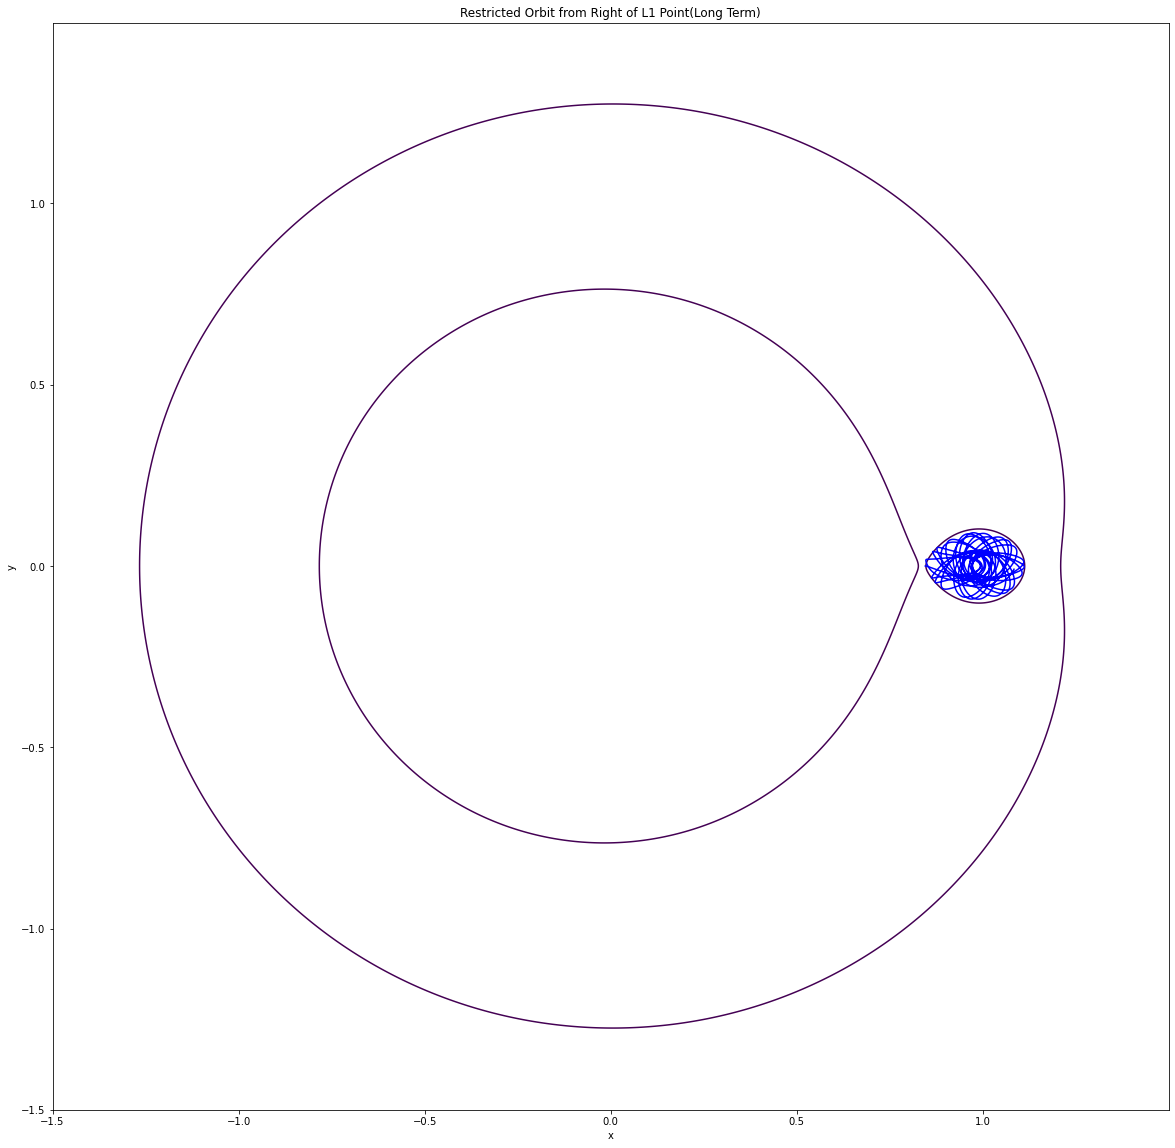

In [131]:
feature_x = np.arange(-1.5, 1.5, 0.001)
feature_y = np.arange(-1.5, 1.5, 0.001)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
# print(type(X))
# print(len(X))
  
f = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(20)
Z = X**2 + Y**2 + 2*(1-u)/np.sqrt((X+u)**2+Y**2) + 2*u/np.sqrt((X-1+u)**2+Y**2)
  
# plots contour lines
ax.contour(X, Y, Z, [3.18950841737352])
  
ax.set_title('Restricted Orbit from Right of L1 Point(Long Term)')
ax.set_xlabel('x')
ax.set_ylabel('y') 

x_out,vx_out,y_out,vy_out,t = EulerRichardson(L1+0.01*L1,0,0,0,0,30,100000)
plt.plot(x_out,y_out,'b')

plt.savefig('foo.png')


plt.show()

<Figure size 432x288 with 0 Axes>

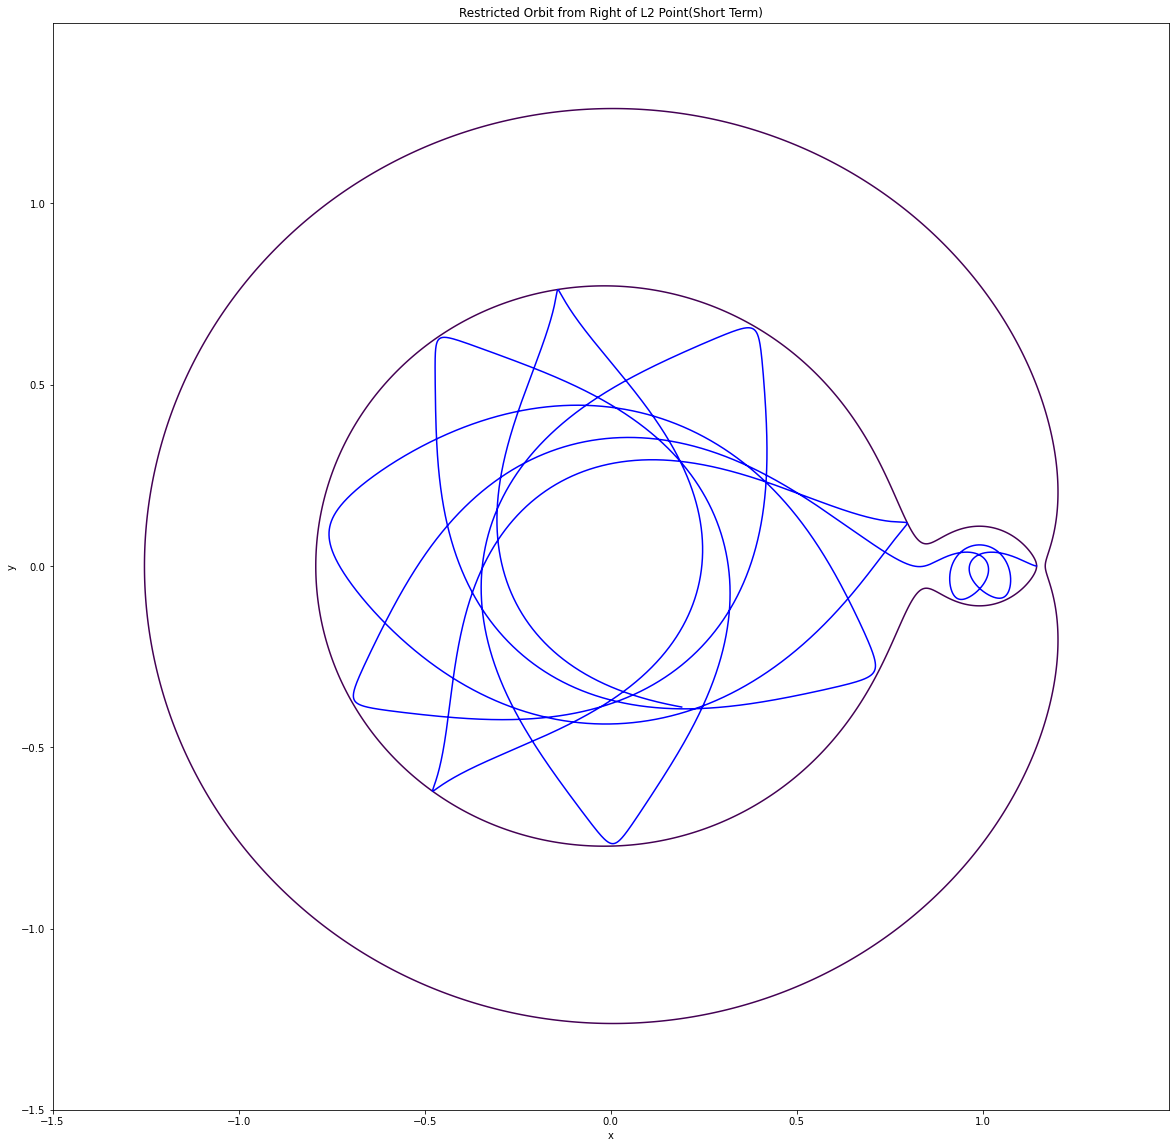

In [137]:
feature_x = np.arange(-1.5, 1.5, 0.001)
feature_y = np.arange(-1.5, 1.5, 0.001)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)

  
f = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(20)
Z = X**2 + Y**2 + 2*(1-u)/np.sqrt((X+u)**2+Y**2) + 2*u/np.sqrt((X-1+u)**2+Y**2)
  
# plots contour lines
ax.contour(X, Y, Z, [C2])
  
ax.set_title('Restricted Orbit from Right of L2 Point(Short Term)')
ax.set_xlabel('x')
ax.set_ylabel('y') 

x_out,vx_out,y_out,vy_out,t = EulerRichardson(L2-0.01*L2,0,0,0,0,30,100000)
plt.plot(x_out,y_out,'b')


plt.show()

<Figure size 432x288 with 0 Axes>

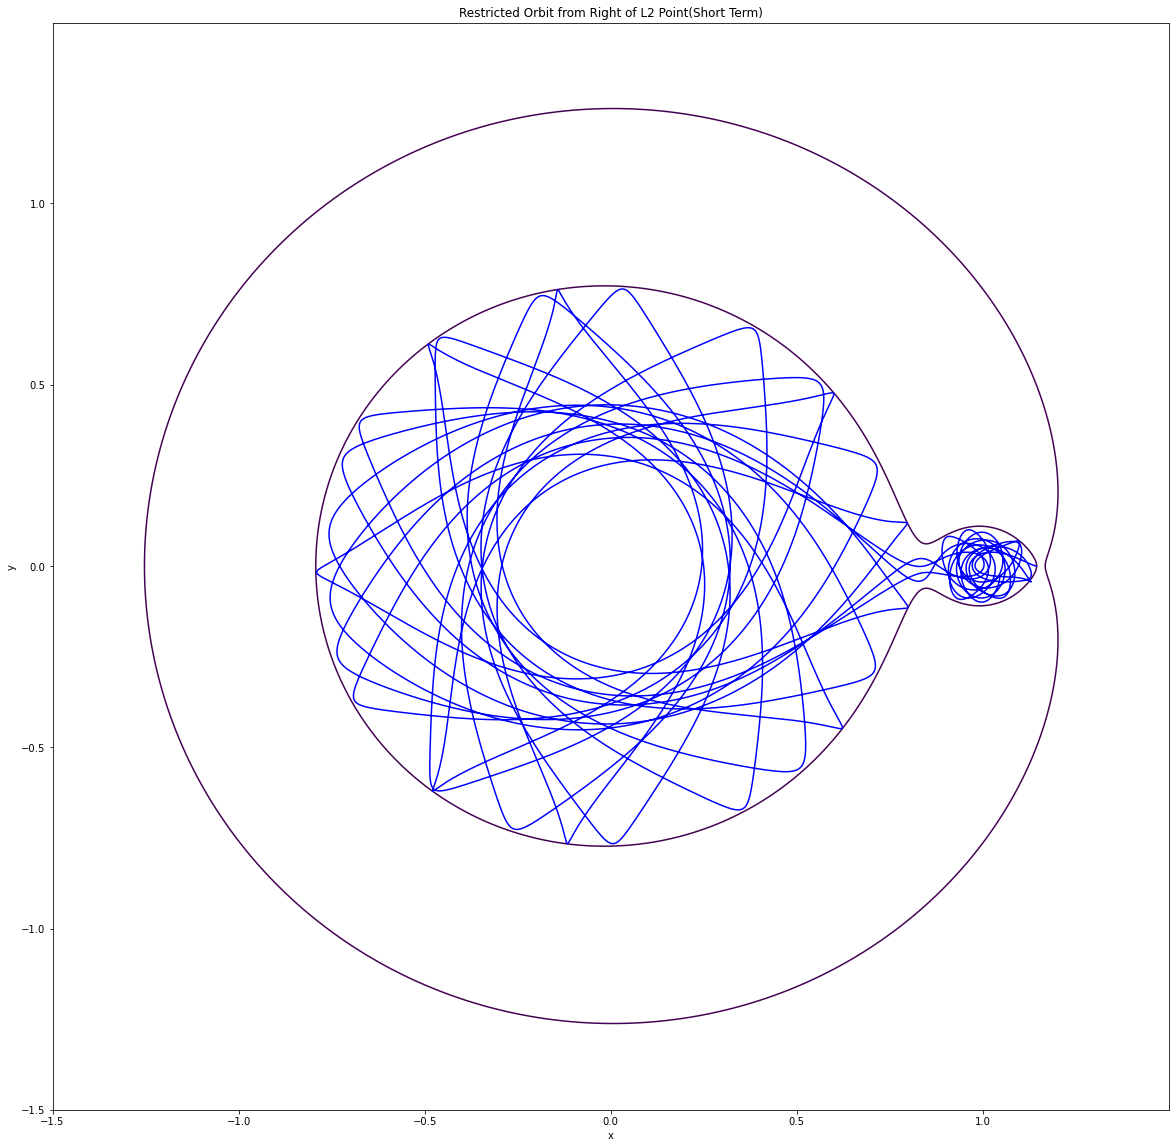

In [139]:
feature_x = np.arange(-1.5, 1.5, 0.001)
feature_y = np.arange(-1.5, 1.5, 0.001)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)

  
f = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(20)
Z = X**2 + Y**2 + 2*(1-u)/np.sqrt((X+u)**2+Y**2) + 2*u/np.sqrt((X-1+u)**2+Y**2)
  
# plots contour lines
ax.contour(X, Y, Z, [C2])
  
ax.set_title('Restricted Orbit from Right of L2 Point(Long Term)')
ax.set_xlabel('x')
ax.set_ylabel('y') 

x_out,vx_out,y_out,vy_out,t = EulerRichardson(L2-0.01*L2,0,0,0,0,100,100000)
plt.plot(x_out,y_out,'b')


plt.show()

<Figure size 432x288 with 0 Axes>

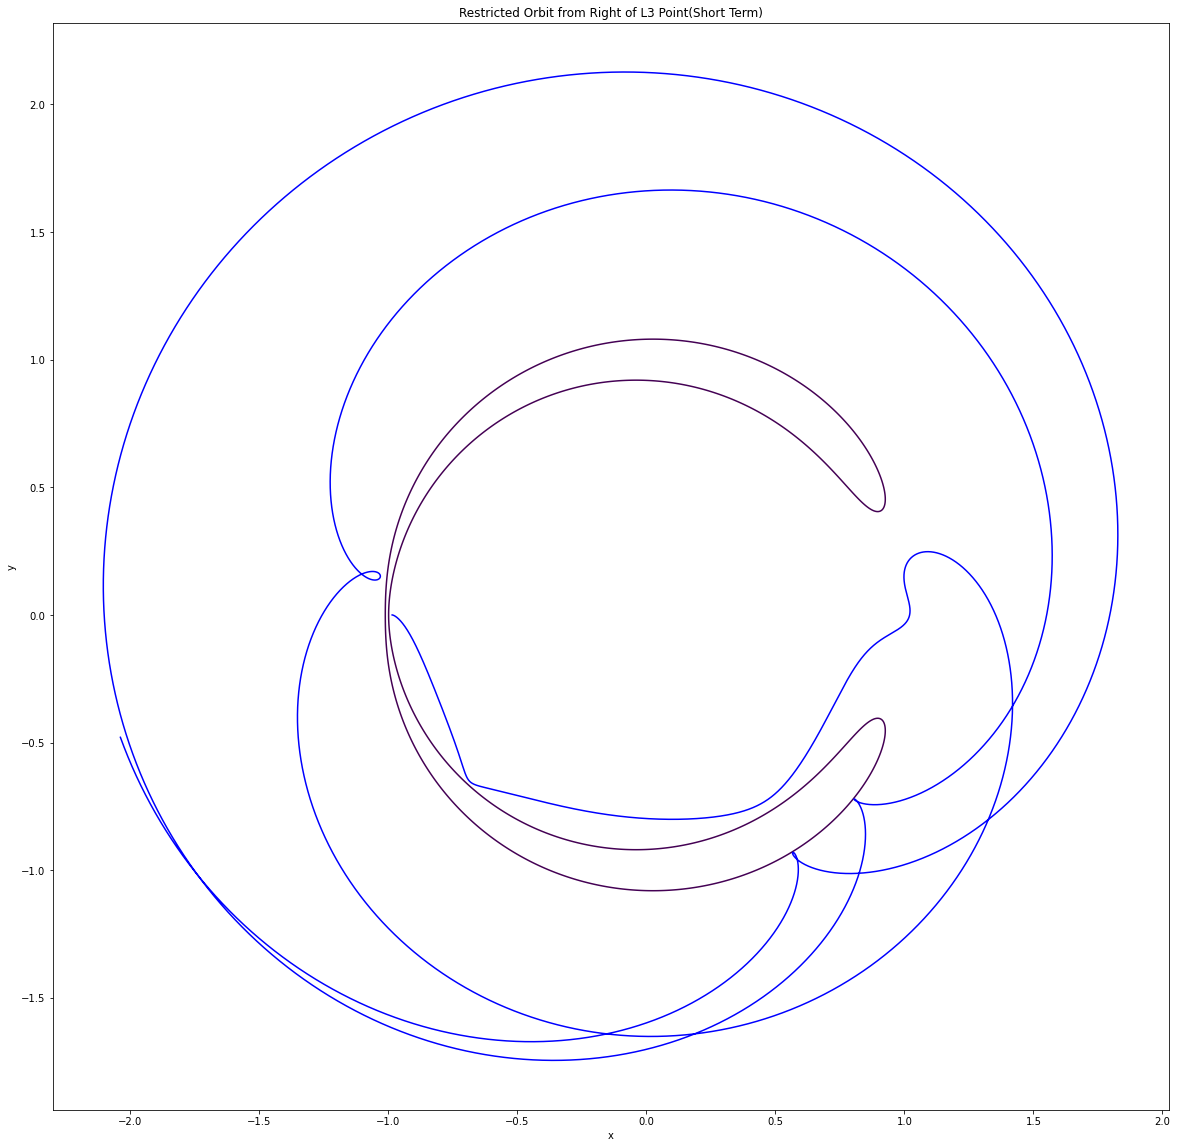

In [196]:
feature_x = np.arange(-1.5, 1.5, 0.001)
feature_y = np.arange(-1.5, 1.5, 0.001)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)

  
f = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(20)
Z = X**2 + Y**2 + 2*(1-u)/np.sqrt((X+u)**2+Y**2) + 2*u/np.sqrt((X-1+u)**2+Y**2)
  
# plots contour lines
ax.contour(X, Y, Z, [C3])
  
ax.set_title('Restricted Orbit from Right of L3 Point(Short Term)')
ax.set_xlabel('x')
ax.set_ylabel('y') 

x_out,vx_out,y_out,vy_out,t = EulerRichardson(L3-0.02*L3,0,0,0,0,50,100000)
plt.plot(x_out,y_out,'b')


plt.show()

<Figure size 432x288 with 0 Axes>

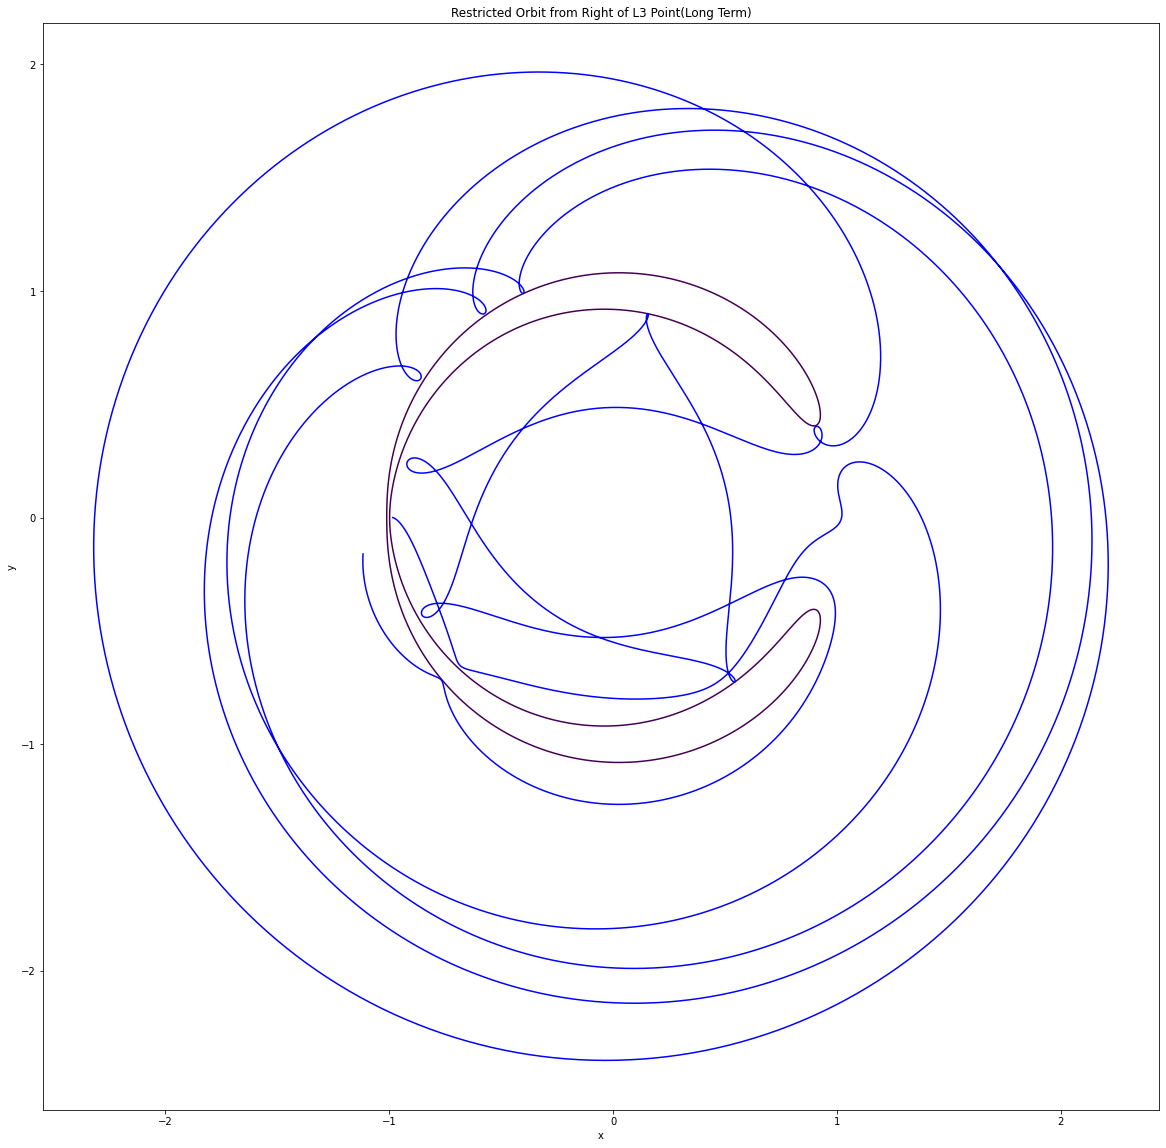

In [200]:
feature_x = np.arange(-1.5, 1.5, 0.001)
feature_y = np.arange(-1.5, 1.5, 0.001)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)

  
f = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(20)
Z = X**2 + Y**2 + 2*(1-u)/np.sqrt((X+u)**2+Y**2) + 2*u/np.sqrt((X-1+u)**2+Y**2)
  
# plots contour lines
ax.contour(X, Y, Z, [C3])
  
ax.set_title('Restricted Orbit from Right of L3 Point(Long Term)')
ax.set_xlabel('x')
ax.set_ylabel('y') 

x_out,vx_out,y_out,vy_out,t = EulerRichardson(L3-0.02*L3,0,0,0,0,100,10000)
plt.plot(x_out,y_out,'b')


plt.show()

<Figure size 432x288 with 0 Axes>

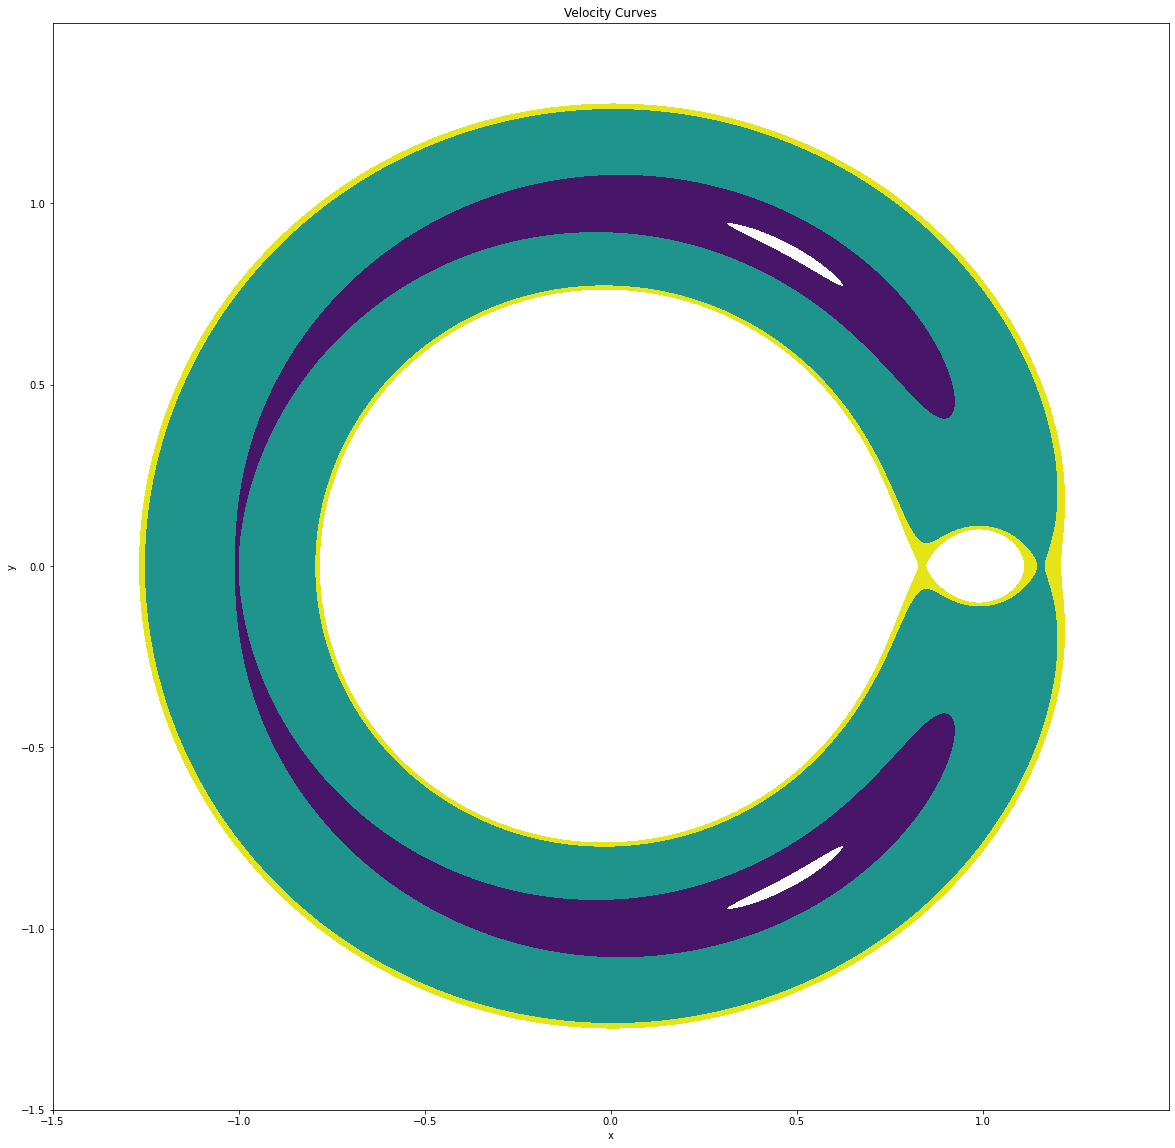

In [268]:
feature_x = np.arange(-1.5, 1.5, 0.001)
feature_y = np.arange(-1.5, 1.5, 0.001)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)

  
f = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(20)
Z = X**2 + Y**2 + 2*(1-u)/np.sqrt((X+u)**2+Y**2) + 2*u/np.sqrt((X-1+u)**2+Y**2)
  
# plots contour lines
ax.contourf(X, Y, Z, [C4,C3,C2,C1])


  
ax.set_title('Velocity Curves')
ax.set_xlabel('x')
ax.set_ylabel('y') 


plt.show()